<a href="https://colab.research.google.com/github/DamodaraBarbosa/estudos_data_science/blob/main/Database_imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratando a base de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importando o arquivo .csv

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

In [ ]:
database = pd.read_csv(url)
database

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [ ]:
database.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4908,Rua Fonseca da Costa,Bosque da Saúde,São Paulo,271,4,4,8,R$ 2.500.000
5752,"Rua Joaquim Lima de Moraes, 53",Santo Amaro,São Paulo,220,3,5,2,R$ 1.500.000
5411,NaN,Jardim Panorama,São Paulo,400,3,4,3,R$ 2.280.000
7342,NaN,Sumaré,São Paulo,160,8,3,5,R$ 8.500\n /Mês
8735,NaN,Vila Cláudia,São Paulo,171,3,2,2,R$ 1.350.000
2436,"Rua Japuanga, 265",Vila Ida,São Paulo,400,3,1,5,R$ 4.043.000
9718,"Rua Orlando Ferraiuolo, 428",Vila Brasilina,São Paulo,250,3,3,4,R$ 689.000
1445,Rua do Minho,Jardim Luzitânia,São Paulo,300,3,5,5,R$ 13.000\n /Mês
8343,Rua Ministro Rodrigo Otávio,Jabaquara,São Paulo,180,4,3,2,R$ 4.300\n /Mês
3048,"Rua Simão Machado, 101, Apto 07",Tucuruvi,São Paulo,90,2,2,2,R$ 460.000


Tratando a variável valor

In [ ]:
data_valor = database['Valor'].str.split(expand = True)
#o parâmetro 'expand = True' forma um dataframe
data_valor

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
database['Moeda'] = data_valor[0]
database['Valor real'] = data_valor[1]
database['Modalidade'] = data_valor[2]

In [ ]:
database.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor real,Modalidade
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
# para apagar a coluna valor
database.pop('Valor')

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

In [ ]:
# selecionando os dados onde a variável 'Modalidade' é nula
modalidade_NaN = database['Modalidade'].isna()

In [ ]:
# dados com /Mês, /Dia, /Ano são descartados, provavelmente são referentes a aluguéis
database = database[modalidade_NaN]


In [ ]:
# apagando a variável 'Modalidade'
database.pop('Modalidade')

0        None
1        None
2        None
3        None
4        None
         ... 
10002    None
10003    None
10004    None
10005    None
10007    None
Name: Modalidade, Length: 9156, dtype: object

In [ ]:
# convertendo a variável 'Valor real' de string (object) para float
database['Valor real'] = database['Valor real'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
database.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.0


Retirando os valores nulos da variável Bairro

In [ ]:
# como a ideia é fazer uma análise mais aprofundada de cada bairro posteriormente, optou-se por retirar as rows em que a variável 'Bairro' fosse nula.

In [ ]:
bairro_NaN = database['Bairro'].isnull()

In [ ]:
database = database[~bairro_NaN]
database

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.0
...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$,1500000.0
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$,1050000.0


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6097 non-null   object 
 1   Bairro      9146 non-null   object 
 2   Cidade      9146 non-null   object 
 3   Metragem    9146 non-null   int64  
 4   Quartos     9146 non-null   int64  
 5   Banheiros   9146 non-null   int64  
 6   Vagas       9146 non-null   int64  
 7   Moeda       9146 non-null   object 
 8   Valor real  9146 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 714.5+ KB


Ajustando o index do dataframe

In [ ]:
database.shape

(9146, 9)

In [ ]:
database.index = range(database.shape[0])

**Identificando os outliers**

Variável metragem


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
# ajuste de casas decimais para o formato float, no caso para apenas duas casas decimais

In [ ]:
database.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor real
count,9146.00,9146.00,9146.00,9146.00,9146.00
mean,434.25,3.45,3.79,3.96,3050596.46
std,7860.71,1.05,1.97,2.60,3945437.70
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,275.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


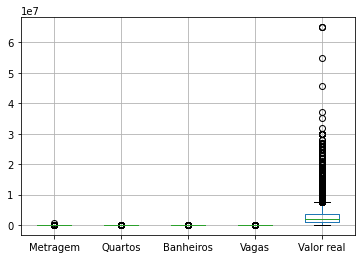

In [ ]:
database.boxplot(['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor real'])

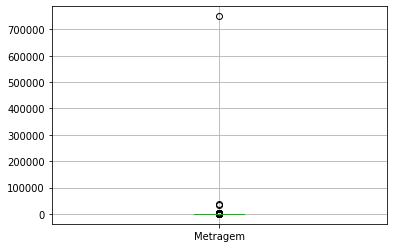

In [ ]:
# começando a tratar por metragem
metragem = database['Metragem']
database.boxplot('Metragem')

In [ ]:
Q1 = metragem.quantile(0.25)
Q3 = metragem.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [ ]:
margem_metragem = (metragem >= limite_inferior) & (metragem <= limite_superior)
database_metragem = database[margem_metragem]

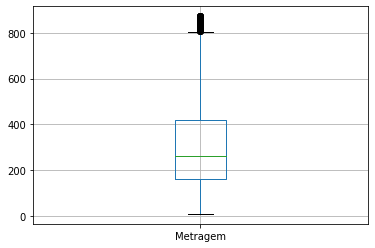

In [ ]:
database_metragem.boxplot('Metragem')

In [ ]:
database_outliers_metragem_removidos = database_metragem.to_csv('database_outliers_metragem_removidos.csv')

Variável valor real

In [ ]:
valor = database['Valor real']

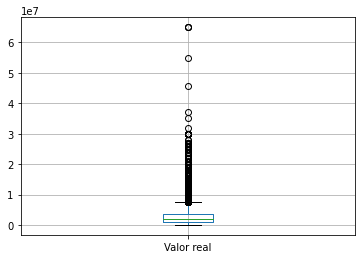

In [ ]:
database.boxplot('Valor real')

In [ ]:
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [ ]:
margem_valor = (valor >= limite_inferior) & (valor <= limite_superior)
database_valor = database[margem_valor]

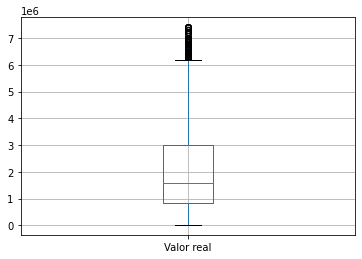

In [ ]:
database_valor.boxplot('Valor real')

In [ ]:
database[database['Valor real'] > 6200000]
# é necessário um olhar mais detalhado 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00
30,Rua dos Plátanos,Cidade Jardim,São Paulo,1195,4,4,6,R$,8700000.00
67,Rua Bolívia,Jardim América,São Paulo,663,4,7,6,R$,14500000.00
68,Rua General Fonseca Teles,Jardim Paulista,São Paulo,420,4,6,3,R$,8700000.00
82,"Rua Cordisburgo, 251",Jardim Leonor,São Paulo,850,4,8,6,R$,6500000.00
...,...,...,...,...,...,...,...,...,...
9066,NaN,Jardim Leonor,São Paulo,1345,5,9,7,R$,9500000.00
9089,Rua Alvorada do Sul,Jardim Guedala,São Paulo,605,5,7,5,R$,8000000.00
9100,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$,9500000.00
9123,Rua Alvorada do Sul,Jardim Guedala,São Paulo,605,5,7,5,R$,8000000.00


In [ ]:
database_outliers_valor_removidos = database_valor.to_csv('database_outliers_valor_removidos.csv')

Variável quartos

In [ ]:
quartos = database['Quartos']

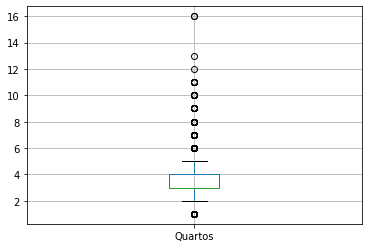

In [ ]:
database.boxplot('Quartos')

In [ ]:
Q1 = quartos.quantile(0.25)
Q3 = quartos.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [ ]:
margem_quartos = (database['Quartos'] >= limite_inferior) & (database['Quartos'] <= limite_superior)

In [ ]:
database_quartos = database[margem_quartos]

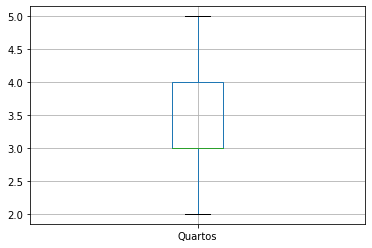

In [ ]:
database_quartos.boxplot('Quartos')

In [ ]:
database_outliers_quartos_removidos = database_quartos.to_csv('database_outliers_quartos_removidos.csv')

Variável banheiros

In [ ]:
banheiros = database['Banheiros']

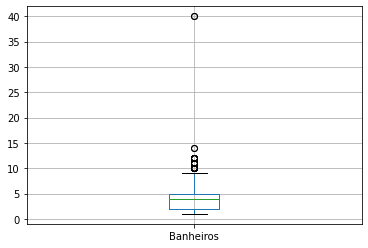

In [ ]:
database.boxplot('Banheiros')


In [ ]:
Q1 = banheiros.quantile(0.25)
Q3 = banheiros.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
margem_banheiros = (database['Banheiros'] >= limite_inferior) & (database['Banheiros'] <= limite_superior)

In [ ]:
database_banheiros = database[margem_banheiros]

In [ ]:
database_banheiros

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.00
...,...,...,...,...,...,...,...,...,...
9141,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$,1500000.00
9142,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$,665000.00
9143,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$,2300000.00
9144,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$,1050000.00


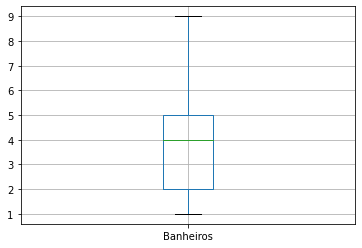

In [ ]:
database_banheiros.boxplot('Banheiros')

In [ ]:
database_outliers_banheiros_removidos = database_banheiros.to_csv('database_outliers_banheiros_removidos.csv')

Variável vagas

In [ ]:
vagas = database['Vagas']

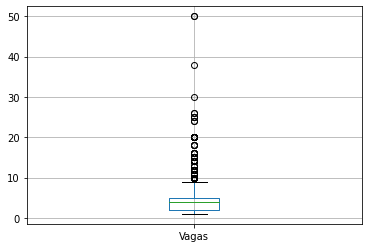

In [ ]:
database.boxplot('Vagas')

In [ ]:
Q1 = vagas.quantile(0.25)
Q3 = vagas.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
margem_vagas = (database['Vagas'] >= limite_inferior) & (database['Vagas'] <= limite_superior)

In [ ]:
database_vagas = database[margem_vagas]

In [ ]:
database_vagas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.00
...,...,...,...,...,...,...,...,...,...
9141,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$,1500000.00
9142,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$,665000.00
9143,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$,2300000.00
9144,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$,1050000.00


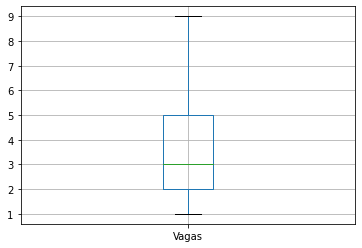

In [ ]:
database_vagas.boxplot('Vagas')

In [ ]:
database_outliers_vagas_removidos = database_vagas.to_csv('database_outliers_vagas_removidos.csv')